# v. Visualization essentials

![viz](img/viz.png)

In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# make sure plots show in the notebook
%matplotlib inline

After importing data, you should examine it closely. 

1. Look at the raw data ans perform rough checks of your assumptions
2. Compute summary statistics
3. Produce visualizations to illustrate obvious - or not so obvious - trends in the data

## Plotting with seaborn

### First, a note about matplotlib
There are many different ways to visualize data in Python but they virtually all rely on matplotlib. You should take some time to read through the tutorial: https://matplotlib.org/stable/tutorials/introductory/pyplot.html. 

Because many other libraries depend on matplotlib under the hood, you should familiarize yourself with the basics. For example: 

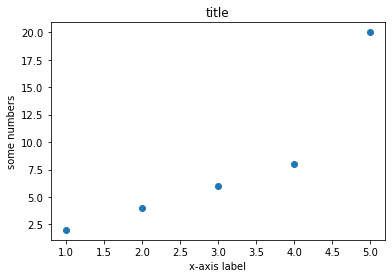

In [2]:
import matplotlib.pyplot as plt
x = [1,2,3,4,5]
y = [2,4,6,8,20]
plt.scatter(x, y)
plt.title('title')
plt.ylabel('some numbers')
plt.xlabel('x-axis label')
plt.show()

## Visualization best practices

Consult Wilke's _Fundamentals of Data Visualization_ https://clauswilke.com/dataviz/ for discussions of theory and best practices. 

The **goal of data visualization** is to accurately communicate _something_ about the data. This could be an amount, a distribution, relationship, predictions, or the results of sorted data.

Utilize characteristics of different data types to manipulate the aesthetics of plot axes and coordinate systems, color scales and gradients, and formatting and arrangements to impress your audience!

![wilke](img/wilke.png)

![wilke12](img/wilke12.png)

## Summary statistics - pandas review

In [4]:
# load the Gapminder dataset
gap = pd.read_csv("data/gapminder-FiveYearData.csv")

In [5]:
# view column names of Gapminder data
gap.columns

Index(['country', 'year', 'pop', 'continent', 'lifeExp', 'gdpPercap'], dtype='object')

### All columns

In [5]:
# mean of all variables except country
gap.groupby('continent').mean()

year           pop    lifeExp     gdpPercap
continent                                               
Africa     1979.5  9.916003e+06  48.865330   2193.754578
Americas   1979.5  2.450479e+07  64.658737   7136.110356
Asia       1979.5  7.703872e+07  60.064903   7902.150428
Europe     1979.5  1.716976e+07  71.903686  14469.475533
Oceania    1979.5  8.874672e+06  74.326208  18621.609223

### One column

In [7]:
# Mean life expectancy for each continent
gap.groupby('continent')["lifeExp"].mean()

continent
Africa      48.865330
Americas    64.658737
Asia        60.064903
Europe      71.903686
Oceania     74.326208
Name: lifeExp, dtype: float64

### Multiple columns

In [8]:
# Mean lifeExp and gdpPercap for each continent
le_table = gap.groupby('continent')[["lifeExp", "gdpPercap"]].mean()
le_table

lifeExp     gdpPercap
continent                         
Africa     48.865330   2193.754578
Americas   64.658737   7136.110356
Asia       60.064903   7902.150428
Europe     71.903686  14469.475533
Oceania    74.326208  18621.609223

## Basic plots

1. Histogram: visualize distribution of one continuous (i.e., integer or float) variable.

2. Boxplot: visualize the distribution of one continuous variable.

3. Scatterplot: visualize the relationship between two continuous variables. 

## Histogram

Use a histogram to plot the distribution of one continuous (i.e., integer or float) variable. 

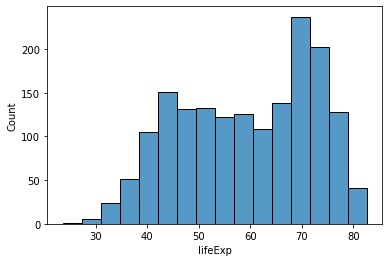

In [22]:
# all data
sns.histplot(data = gap,
            x = 'lifeExp'); 

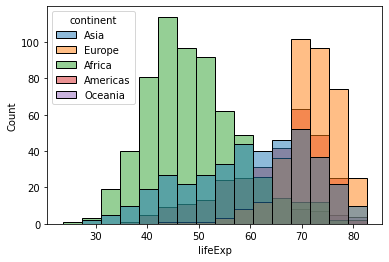

In [13]:
# by continent
sns.histplot(data = gap, 
            x = 'lifeExp', 
            hue = 'continent');

## Boxplot

Boxplots can be used to visualize one distribution as well, and illustrate different aspects of the table of summary statistics.

In [10]:
# summary statistics
gap.describe()

year           pop      lifeExp      gdpPercap
count  1704.00000  1.704000e+03  1704.000000    1704.000000
mean   1979.50000  2.960121e+07    59.474439    7215.327081
std      17.26533  1.061579e+08    12.917107    9857.454543
min    1952.00000  6.001100e+04    23.599000     241.165876
25%    1965.75000  2.793664e+06    48.198000    1202.060309
50%    1979.50000  7.023596e+06    60.712500    3531.846988
75%    1993.25000  1.958522e+07    70.845500    9325.462346
max    2007.00000  1.318683e+09    82.603000  113523.132900

<AxesSubplot:ylabel='lifeExp'>

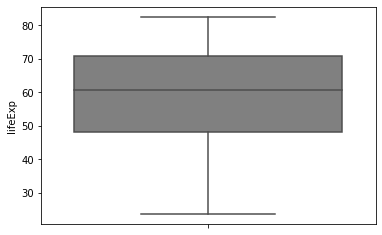

In [14]:
# all data
sns.boxplot(data = gap,
            y = 'lifeExp', 
            color = 'gray')

In [16]:
gap.groupby('continent').count()

country  year  pop  lifeExp  gdpPercap
continent                                        
Africa         624   624  624      624        624
Americas       300   300  300      300        300
Asia           396   396  396      396        396
Europe         360   360  360      360        360
Oceania         24    24   24       24         24

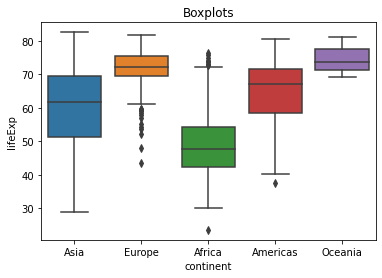

In [20]:
# by continent
sns.boxplot(data = gap,
            x = 'continent', 
            y = 'lifeExp').set_title('Boxplots');

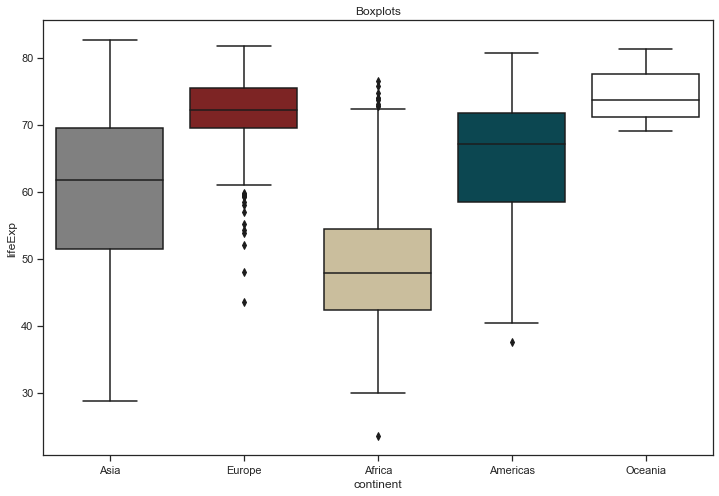

In [34]:
# custom colors
sns.boxplot(data = gap, 
            x = 'continent', 
            y = 'lifeExp', 
            palette = ['gray', '#8C1515', '#D2C295', '#00505C', 'white']).set_title('Boxplots');

## Scatterplot

Scatterplots are useful to illustrate the relationship between two continuous variables. Below are several options for you to try.

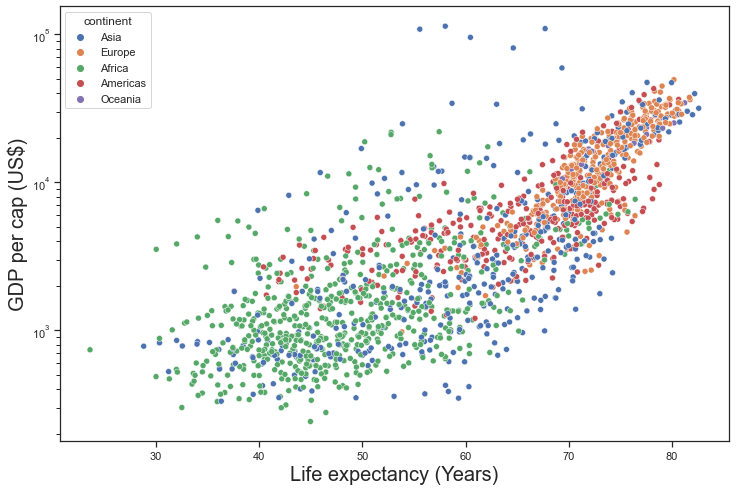

In [28]:
### change figure size
sns.set(rc = {'figure.figsize':(12,8)})

### change background
sns.set_style("ticks")

# commented code
ex1 = sns.scatterplot(
    
    # dataset
    data = gap,
    
    # x-axis variable to plot
    x = 'lifeExp', 
    
    # y-axis variable to plot
    y = 'gdpPercap', 
    
    # color points by categorical variable
    hue = 'continent', 
    
    # point transparency
    alpha = 1)

### log scale y-axis
ex1.set(yscale="log")

### set axis labels
ex1.set_xlabel("Life expectancy (Years)", fontsize = 20)
ex1.set_ylabel("GDP per cap (US$)", fontsize = 20);

### unhashtag to save 
### NOTE: this might only work on local Python installation and not JupyterLab - try it!

# plt.savefig('img/scatter_gap.pdf')

## Quiz - Penguins dataset

Learn more about the biological and spatial characteristics of penguins! 

![penguins](img/penguins.png)

1. Use seaborn to make one of each of the plots in the image below. Check out the seaborn tutorial for more examples and formatting options: https://seaborn.pydata.org/tutorial/function_overview.html
2. What might you conclude about the species of penguins from this dataset? 

![sns](img/sea.png)

### Map of Antarctica

Below is a map of Antarctica past the southernmost tip of the South American continent. 

The distance from the Biscoe Islands (Renaud) to the Torgersen and Dream Islands is about 140 km. 

![antarctica](img/antarctica.png)

In [30]:
# get help with the question mark
# sns.scatterplot?

In [31]:
# load penguins data
penguins = pd.read_csv('data/penguins.csv')

In [32]:
# hint: 
penguins.groupby('island').count()

species  bill_length_mm  bill_depth_mm  flipper_length_mm  \
island                                                                 
Biscoe         168             167            167                167   
Dream          124             124            124                124   
Torgersen       52              51             51                 51   

           body_mass_g  sex  
island                       
Biscoe             167  163  
Dream              124  123  
Torgersen           51   47

In [33]:
# hint:
penguins.groupby('island').mean()

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
island                                                                  
Biscoe          45.257485      15.874850         209.706587  4716.017964
Dream           44.167742      18.344355         193.072581  3712.903226
Torgersen       38.950980      18.429412         191.196078  3706.372549

In [19]:
# 1. relational - scatterplot
# your answer here:



In [20]:
# 2. relational - lineplot
# your answer here:



In [21]:
# 3. distributions - histplot
# your answer here:



In [22]:
# 4. distributions - kdeplot
# your answer here:



In [23]:
# 5. distributions - ecdfplot
# your answer here:



In [24]:
# 6. distributions - rugplot
# your answer here:



In [25]:
# 7. categorical - stripplot
# your answer here:



In [26]:
# 8. categorical - swarmplot
# your answer here:



In [27]:
# 9. categorical - boxplot
# your answer here:



In [28]:
# 10. categorical - violinplot
# your answer here:



In [29]:
# 11. categorical - pointplot
# your answer here:



In [30]:
# 12. categorical - barplot
# your answer here:



## Quiz - Gapminder dataset

Make the twelve plots using the Gapminder dataset.

What can you conclude about income and life expectancy?

Visit https://www.gapminder.org/ to learn more!

### Things you are probably wrong about!

![gapm](img/gapm.png)

See the survey and correct response rate of the [Sustainable Development Misconception Study 2020](https://www.gapminder.org/ignorance/studies/sdg2020/)

In [31]:
# 1. relational - scatterplot
# your answer here:



In [32]:
# 2. relational - lineplot
# your answer here:



In [33]:
# 3. distributions - histplot
# your answer here:



In [34]:
# 4. distributions - kdeplot
# your answer here:



In [35]:
# 5. distributions - ecdfplot
# your answer here:



In [36]:
# 6. distributions - rugplot
# your answer here:



In [37]:
# 7. categorical - stripplot
# your answer here:



In [38]:
# 8. categorical - swarmplot
# your answer here:



In [39]:
# 9. categorical - boxplot
# your answer here:



In [40]:
# 10. categorical - violinplot
# your answer here:



In [41]:
# 11. categorical - pointplot
# your answer here:



In [42]:
# 12. categorical - barplot
# your answer here:

